# Promena palete scene

In [33]:
# Prvo učitavam potrebne biblioteke

import matplotlib.pyplot as plt
import numpy as np
import cv2

In [34]:
# Učitavam slike na kojima ću vršiti obradu

img_dolina = cv2.imread('Slike/dolina.png')
img_planina = cv2.imread('Slike/mountains.png')
img_palma = cv2.imread('Slike/palme.png')
img_suncokret = cv2.imread('Slike/suncokret.png')


In [40]:
# Kako pyhton ucitava slike kao matrice, a vrednosti boja kao BGR konvertujemo ih u RGB kolor sistem

img_dolina = cv2.cvtColor(img_dolina,cv2.COLOR_BGR2RGB)
img_planina = cv2.cvtColor(img_planina,cv2.COLOR_BGR2RGB)
img_palma = cv2.cvtColor(img_palma,cv2.COLOR_BGR2RGB)
img_suncokret = cv2.cvtColor(img_suncokret,cv2.COLOR_BGR2RGB)

Text(0.5, 1.0, 'Slika u jednoj boji BLUE')

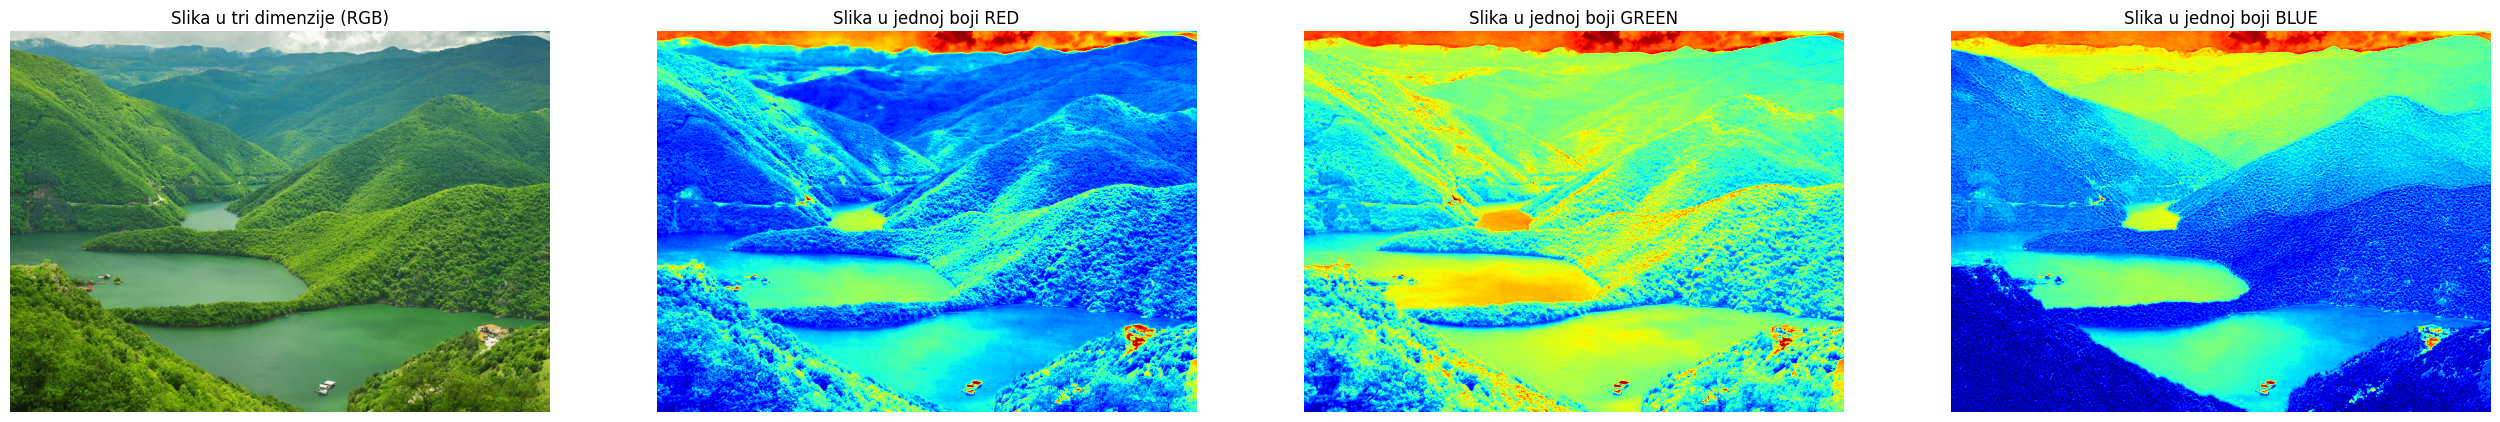

In [36]:
# Delimo 1. sliku na 3 kanala

img_dolina_r = img_dolina[:,:,0] # img_dolina je trodimenzionalna matrica, te u img_golina_r kopiramo za svaki piksel vrednost RED kanala (dvodim. matrica)
# svaka vrednost u matrici img_dolina je niz od 3 vrednosti - vrednosti RGB boja od 0 do 255 po pikselu
# svaka vrednost u matrici imd_dolina_r je 1 vrednost - vrednost crvene boje za svaki piksel iz img_dolina
# svaka vrednost u matrici imd_dolina_g je 1 vrednost - vrednost zelene boje za svaki piksel iz img_dolina
# svaka vrednost u matrici imd_dolina_b je 1 vrednost - vrednost plave zelene za svaki piksel iz img_dolina

img_dolina_g = img_dolina[:,:,1]
img_dolina_b = img_dolina[:,:,2]

fig, ax = plt.subplots(1,4,figsize=(32,22))
ax[0].imshow(img_dolina)
ax[0].axis('off')
ax[0].set_title('Slika u tri dimenzije (RGB)')
ax[1].imshow(img_dolina_r,cmap='jet')
ax[1].axis('off')
ax[1].set_title('Slika u jednoj boji RED')
ax[2].imshow(img_dolina_g,cmap='jet')
ax[2].axis('off')
ax[2].set_title('Slika u jednoj boji GREEN')
ax[3].imshow(img_dolina_b,cmap='jet')
ax[3].axis('off')
ax[3].set_title('Slika u jednoj boji BLUE')

In [37]:
img_dolina_r.min()
img_dolina_r.max()
img_dolina_r.flatten().shape
img_dolina_r

array([[210, 207, 205, ...,  69,  68,  65],
       [209, 207, 206, ...,  79,  79,  80],
       [207, 206, 207, ..., 116, 118, 119],
       ...,
       [  8,  16,  38, ...,  94, 102, 113],
       [  9,   5,  18, ...,  78,  88,  87],
       [ 17,  21,  16, ...,  83,  92,  75]], dtype=uint8)

Text(0.5, 1.0, 'histogram BLUE')

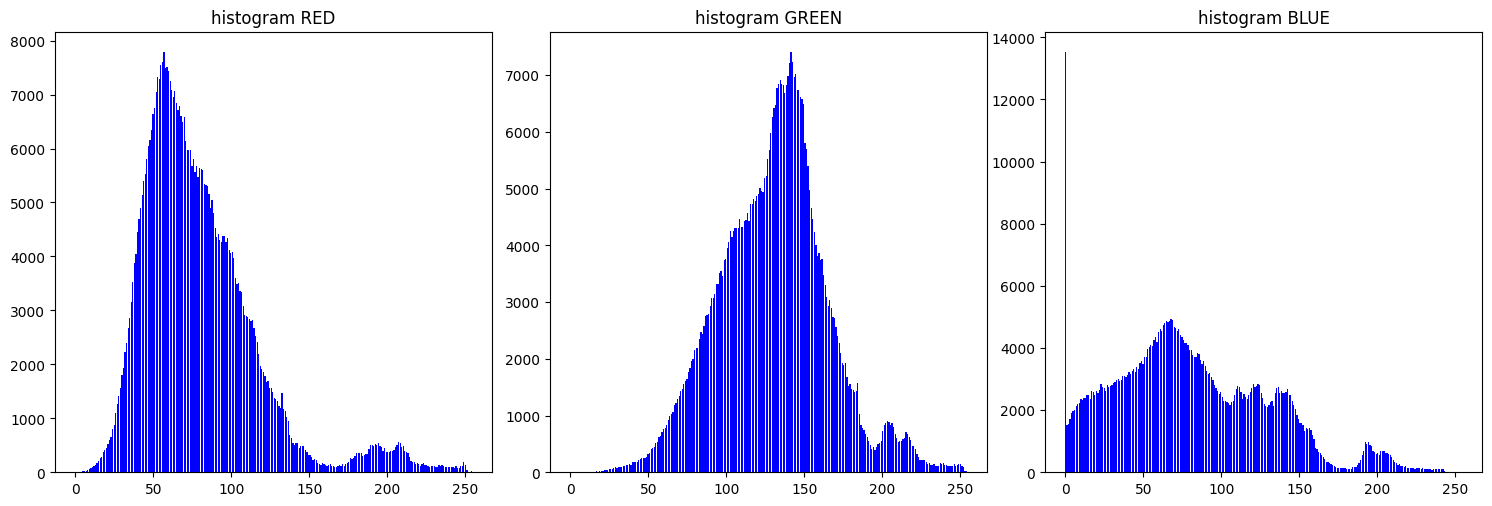

In [51]:
# histogram je grafički prikaz zastupljenosti podatka u nekom datasetu
# u našim slikama (matricama) su zastupljene vrednosti od 0 do 255
# koristimo histograme da prikažemo zastupljenosti tih vrednosti u matrici (koliko piksela ima vred crvene boje 255, koliko 0, koliko 178...)
# funkcija np.histogram radi samo na nizovima te na matricu image_dolina_r izvrsavamo metodu flatten() koja ce nadovezati redove jedne na druge

## STA SE DESAVA sA HIStOGRAMOM RGB SLIKE?????
fig, ax = plt.subplots(1,3,figsize=(15,5))
fig.tight_layout()

hist_d_r, bin_edges1 = np.histogram(img_dolina_r.flatten(), bins=256, range = (0,255))
hist_d_g, bin_edges2 = np.histogram(img_dolina_g.flatten(), bins=256, range = (0,255))
hist_d_b, bin_edges3 = np.histogram(img_dolina_b.flatten(), bins=256, range = (0,255))


ax[0].bar(bin_edges1[0:-1], hist_d_r, color= 'b')
ax[0].set_title('histogram RED')
ax[1].bar(bin_edges1[0:-1], hist_d_g, color= 'b')
ax[1].set_title('histogram GREEN')
ax[2].bar(bin_edges1[0:-1], hist_d_b, color= 'b')
ax[2].set_title('histogram BLUE')

Text(0.5, 1.0, 'Slika u jednoj boji BLUE')

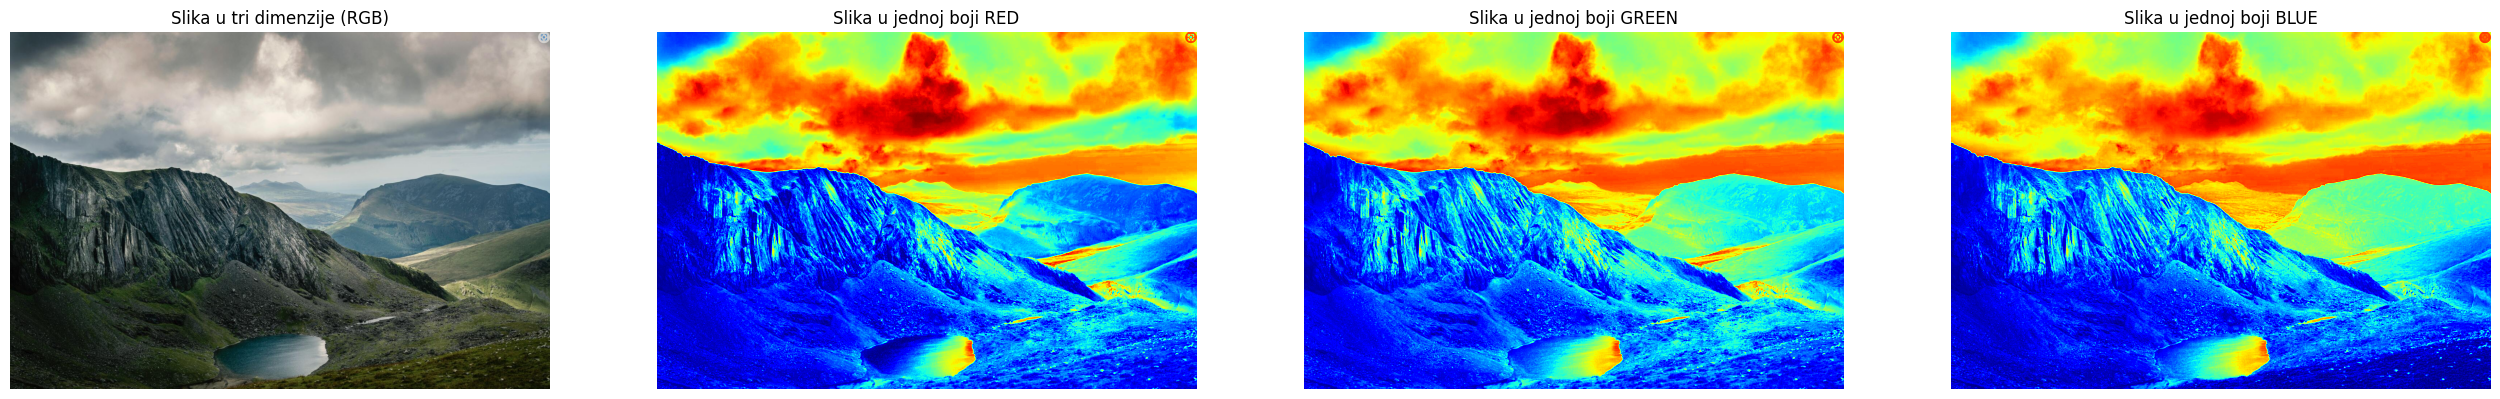

In [39]:
# Ponavljamo postupak razdvajanja kanala za sliku koju menjamo


img_planina_r = img_planina[:,:,0]
img_planina_g = img_planina[:,:,1]
img_planina_b = img_planina[:,:,2]

fig, ax = plt.subplots(1,4,figsize=(32,22))
ax[0].imshow(img_planina)
ax[0].axis('off')
ax[0].set_title('Slika u tri dimenzije (RGB)')
ax[1].imshow(img_planina_r,cmap='jet')
ax[1].axis('off')
ax[1].set_title('Slika u jednoj boji RED')
ax[2].imshow(img_planina_g,cmap='jet')
ax[2].axis('off')
ax[2].set_title('Slika u jednoj boji GREEN')
ax[3].imshow(img_planina_b,cmap='jet')
ax[3].axis('off')
ax[3].set_title('Slika u jednoj boji BLUE')

Text(0.5, 1.0, 'histogram BLUE')

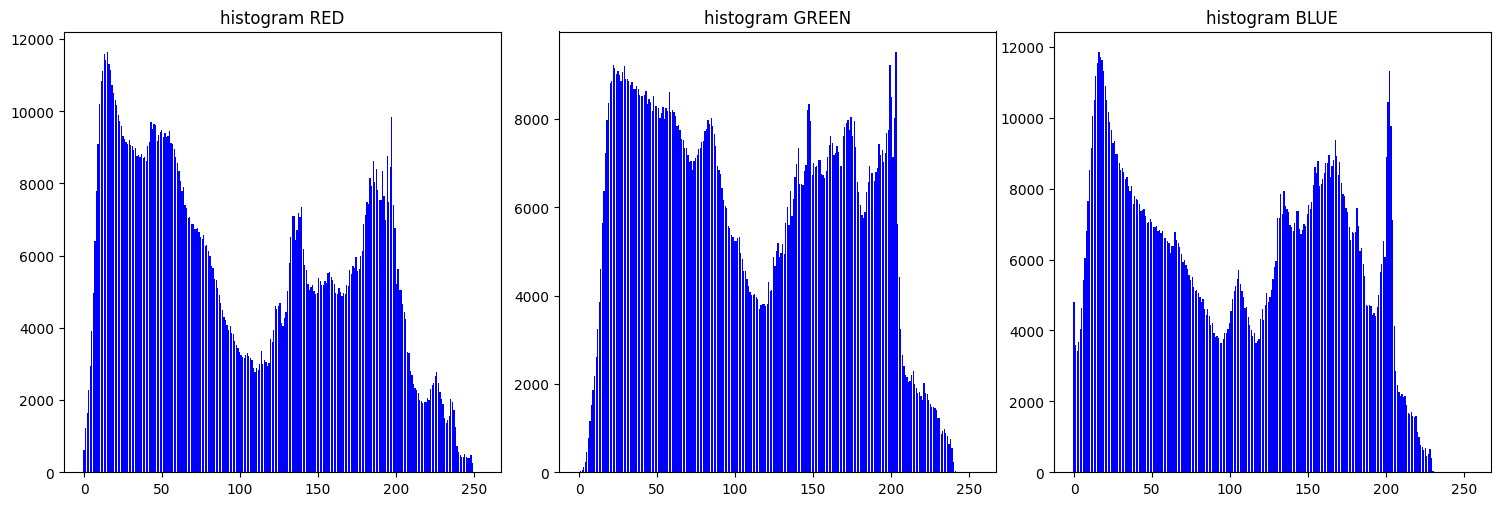

In [52]:
# Ponavljamo postupak generisanja histograma za svaki kanal slike

fig, ax = plt.subplots(1,3,figsize=(15,5))
fig.tight_layout()

hist_p_r, bin_edges1 = np.histogram(img_planina_r.flatten(), bins=256, range = (0,255))
hist_p_g, bin_edges2 = np.histogram(img_planina_g.flatten(), bins=256, range = (0,255))
hist_p_b, bin_edges3 = np.histogram(img_planina_b.flatten(), bins=256, range = (0,255))


ax[0].bar(bin_edges1[0:-1], hist_p_r, color= 'b')
ax[0].set_title('histogram RED')
ax[1].bar(bin_edges1[0:-1], hist_p_g, color= 'b')
ax[1].set_title('histogram GREEN')
ax[2].bar(bin_edges1[0:-1], hist_p_b, color= 'b')
ax[2].set_title('histogram BLUE')